## Contents 
1. [<span style="color:black">Import packages</span>](#1) <a id="one"></a>  
2. [<span style="color:black">Read in data</span>](#2)  <a id="two"></a>  
3. [<span style="color:black">Frequency per year in types/context date ranges</span>](#3) <a id="three"></a>  
4. [<span style="color:black">Type count per year in types/context date ranges</span>](#4) <a id="four"></a>   
5. [<span style="color:black">Plot line graphs</span>](#5) <a id="five"></a>  

### [<span style="color:black">1. Import packages</span>](#one) <a id="1"></a> 

In [1]:
import sys

sys.path.append("../sonata")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from calculation import sum_freq_per_year, year_freq_df, year_object_count_df
from plot import plot_graph 

### [<span style="color:black">2. Read in data</span>](#two)  <a id="2"></a>

In [2]:
data = pd.read_csv("../../data/Sonata_data.csv") 

sites = ["roma", "ostia", "bay_of_naples", "other"]
bay_of_naples = ["palazzo corigliano, naples", "villa arianna, stabiae", "villa san marco, stabiae",  "cuma, tete de cire, phase 2.", "cuma, tete de cire, phase 4.", "rione terra, puteoli",  "casa di ariadna, pompeii", "cratere senga, puteoli"]

start_dates = ["Amphora_type_lower_date", "Lower_context_date"]
end_dates = ["Amphora_type_upper_date", "Upper_context_date"]

freq_type_dates = {}
freq_context_dates = {}

type_count_type_dates = {}
type_count_context_dates = {}

list_of_dfs = []

### [<span style="color:black">3. Frequency per year in types/context date ranges</span>](#three) <a id="3"></a>  

In [3]:
for site in sites:
    for start, end in zip(start_dates, end_dates):
        if site == "bay_of_naples":
            df = data[data["Site"].isin(bay_of_naples)]
        elif site == "other":
            df = data[(data["Grouped_sites"] !="roma") & (data["Grouped_sites"] !="ostia") & (~data["Site"].isin(bay_of_naples))]
        else:
            df = data[data["Grouped_sites"] == site]
            

        df = df.groupby(["Amphora_type_merged", start, end])["Frequency"].sum()
        df = df.reset_index()
        df = df.rename(columns = {"Frequency":"summed_freq"})
              

        df1= sum_freq_per_year(data = df,
                               sum_freq = "summed_freq",
                               lower_date = start,
                               upper_date = end)

        freq = year_freq_df(data = df1,     
                            lower_date = start,
                            upper_date = end,
                            sum_freq = "Sum_freq_per_year")  

        label = site.capitalize().replace("_", " ")

        if "Amphora" in start or "Amphora" in end:   
            freq_type_dates[label] = freq

        else:
            freq_context_dates[label] = freq

list_of_dfs.append(freq_type_dates)
list_of_dfs.append(freq_context_dates)

### [<span style="color:black">4. Type count per year in types/context date ranges</span>](#four) <a id="4"></a>  

In [4]:
for site in sites:
    for start, end in zip(start_dates, end_dates):
        if site == "bay_of_naples":
            df = data[data["Site"].isin(bay_of_naples)]
        elif site == "other":
            df = data[(data["Grouped_sites"] !="roma") & (data["Grouped_sites"] !="ostia") & (~data["Site"].isin(bay_of_naples))]
        else:
            df = data[data["Grouped_sites"] == site]

        df = df.groupby([start, end])["Amphora_type_merged"].apply(list)
        df = df.reset_index()
        df = df.rename(columns = {"Amphora_type_merged":"List_of_types"})

        type_count = year_object_count_df(data = df, 
                                          lower_date = start,  
                                          upper_date = end,
                                          object_list = "List_of_types")  

        label = site.capitalize().replace("_", " ")

        if "Amphora" in start or "Amphora" in end:   
            type_count_type_dates[label] = type_count
        else:
            type_count_context_dates[label] = type_count
            
list_of_dfs.append(type_count_type_dates)
list_of_dfs.append(type_count_context_dates)

### [<span style="color:black">5. Plot line graphs</span>](#five) <a id="5"></a>

/var/folders/4d/kfj2db4138z2x5gb2pxhczrw0000gp/T/ipykernel_5793/2915302916.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
/var/folders/4d/kfj2db4138z2x5gb2pxhczrw0000gp/T/ipykernel_5793/2915302916.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
/var/folders/4d/kfj2db4138z2x5gb2pxhczrw0000gp/T/ipykernel_5793/2915302916.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
/var/folders/4d/kfj2db4138z2x5gb2pxhczrw0000gp/T/ipykernel_5793/2915302916.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


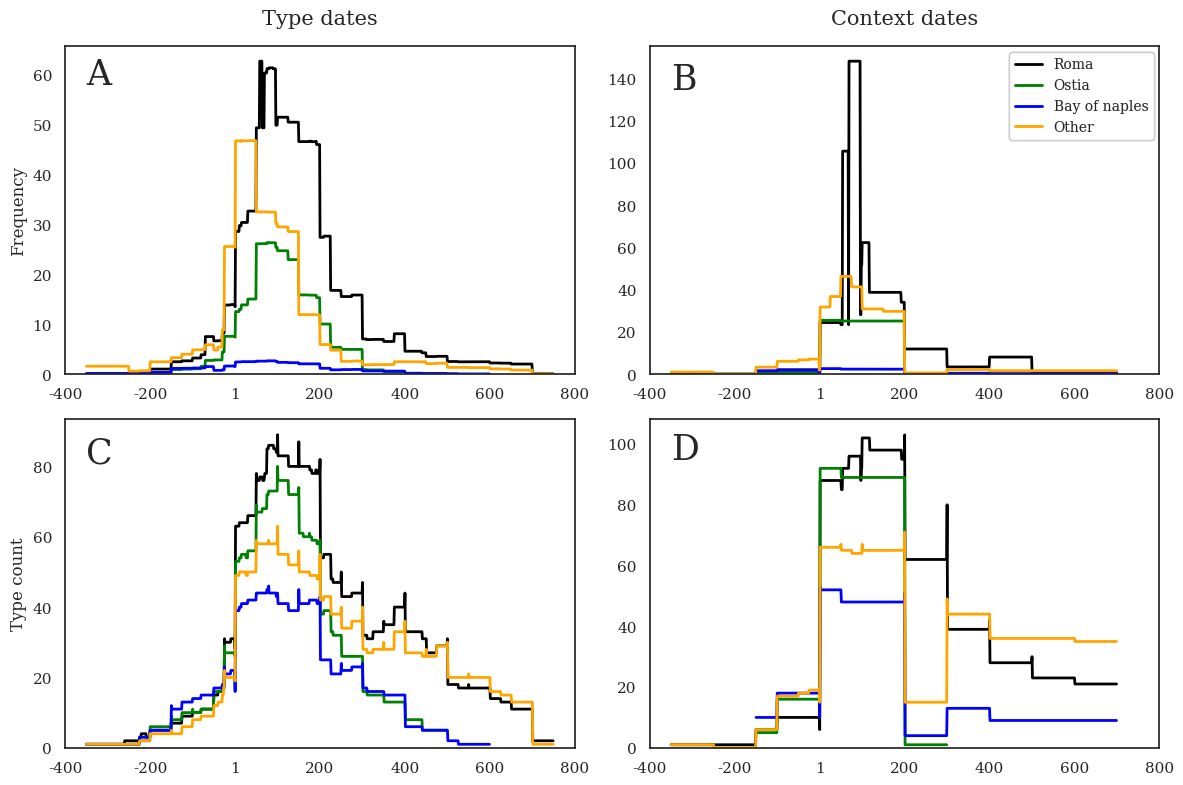

In [12]:
sns.set_style("white", {"font.family":"serif", "font.serif":"Times New Roman"})  

fig, axs= plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axs[0, 0].set_xlim([-400, 800])
axs[0, 1].set_xlim([-400, 800])
axs[1, 0].set_xlim([-400, 800])
axs[1, 1].set_xlim([-400, 800])

for ax, df in zip(axs.ravel(), list_of_dfs):
    plot_graph(dicts_of_df = df,
               palette=["black", "green", "blue", "orange"],
               ax = ax,
               linewidth = 2)

    ax.set_ylim(0, None)
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))  
    ax.set_xlabel(None)
    ax.get_legend().remove()
    ax.set_ylabel(None)
    ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
    handles, labels = ax.get_legend_handles_labels() 
    fig.legend(handles, labels, bbox_to_anchor=(0.974, 0.935), fontsize = 10)

axs[0,0].set_ylabel("Frequency")
axs[1,0].set_ylabel("Type count")

axs[0, 0].set_title(label = "Type dates", size=15, y=1.04)
axs[0, 1].set_title(label = "Context dates", size=15, y=1.04)

axs[0, 0].text(-350, 58, "A", fontsize = 25)
axs[0, 1].text(-350, 135, "B", fontsize = 25)
axs[1, 0].text(-350, 81, "C", fontsize = 25)
axs[1, 1].text(-350, 95, "D", fontsize = 25)

plt.tight_layout()
plt.savefig("../../figs/Fig10a-d.png", bbox_inches="tight")